<a href="https://colab.research.google.com/github/fouziasharkar/Python-Libraries/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np

In [39]:
# till now
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

,0
0,Friday
1,Saturday
2,Saturday


### Timedelta Object

Represents a duration, the difference between two dates or times.

In [40]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [41]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [42]:
# Arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [43]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# real life example
df = pd.read_csv('/content/deliveries (1).csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [45]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

<ipython-input-45-481df77f7c5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
<ipython-input-45-481df77f7c5d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [46]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']

df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [47]:
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [48]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [49]:
google['Date']= pd.to_datetime(google['Date'])

In [50]:
google.head()
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [51]:
google.set_index('Date',inplace=True)

In [54]:
# fetch a specific date

google.loc['2021-12-31']

,2021-12-31
Open,2910.879883
High,2927.300049
Low,2893.550049
Close,2893.590088
Adj Close,2893.590088
Volume,864900.000000


In [56]:
# partial indexing -> select a particular year/month

google.loc['2021'] #year

google.loc['2022-05'] #day

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,2278.129883,2346.790039,2267.989990,2343.139893,2343.139893,1514000
2022-05-03,2335.300049,2386.000000,2332.540039,2362.590088,2362.590088,1060800
2022-05-04,2360.070068,2462.860107,2314.770020,2451.500000,2451.500000,1661600
2022-05-05,2404.409912,2424.665039,2303.649902,2334.929932,2334.929932,2154500
2022-05-06,2310.379883,2349.969971,2282.860107,2313.199951,2313.199951,1764000
2022-05-09,2266.070068,2311.258057,2251.030029,2261.679932,2261.679932,1726000
2022-05-10,2320.810059,2333.820068,2267.666016,2291.689941,2291.689941,1557900
2022-05-11,2274.209961,2333.419922,2273.000000,2279.219971,2279.219971,1825100
2022-05-12,2238.760010,2297.129883,2202.270020,2263.219971,2263.219971,2073200


In [89]:
# create year month-name and day-name
google['month'] = google.index.month_name()
google['day'] = google.index.day_name()
google['quarter'] = google.index.quarter

In [61]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month,day
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday


In [67]:
# slicing

google.loc['2021-12-15':'2022-1-3':2]

,Open,High,Low,Close,Adj Close,Volume,month,day
Date,,,,,,,,
2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000,December,Wednesday
2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2170200,December,Friday
2021-12-21,2863.000000,2893.841064,2834.699951,2884.409912,2884.409912,977400,December,Tuesday
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900,December,Thursday
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,December,Tuesday
2021-12-30,2929.000000,2941.250000,2915.169922,2920.050049,2920.050049,648900,December,Thursday
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700,January,Monday


In [70]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta

pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1))
google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month,day
Date,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday


<Axes: xlabel='Date'>

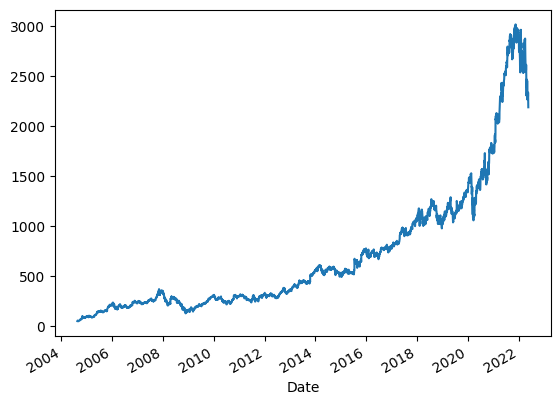

In [71]:
# viz a single col

google['Close'].plot()

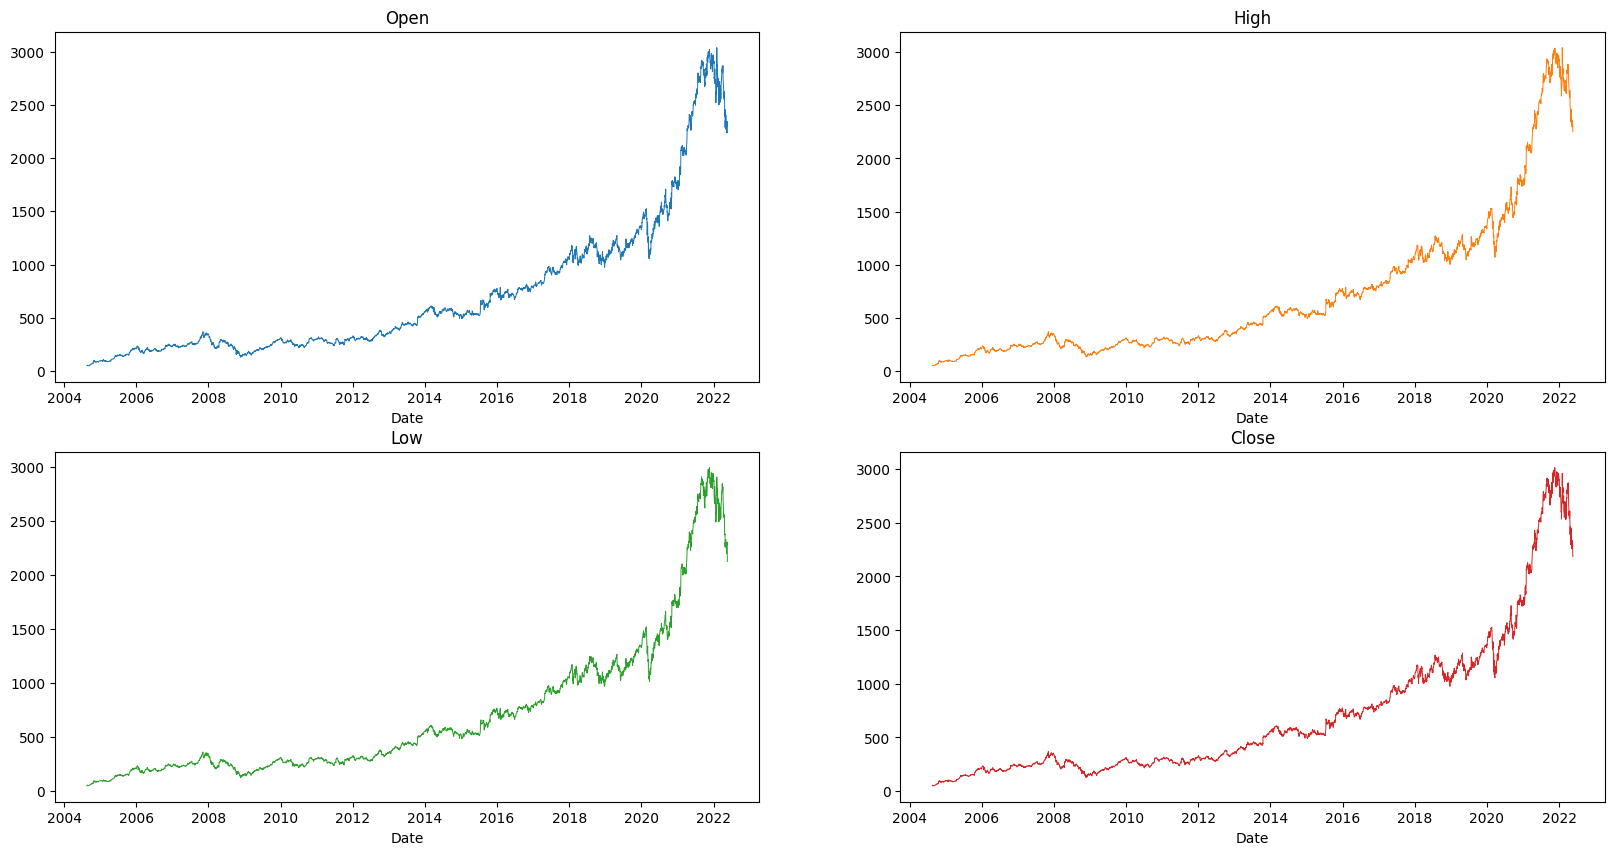

In [72]:
# viz all cols together

subset_google = google[['Open','High','Low','Close']]
ax = subset_google.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Open','High','Low','Close'])

<Axes: xlabel='Date'>

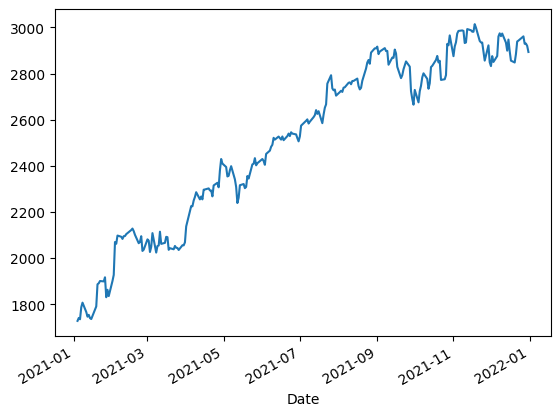

In [77]:
# plot for a particular year/month/week
#year
google.loc['2021']['Close'].plot()

<Axes: xlabel='Date'>

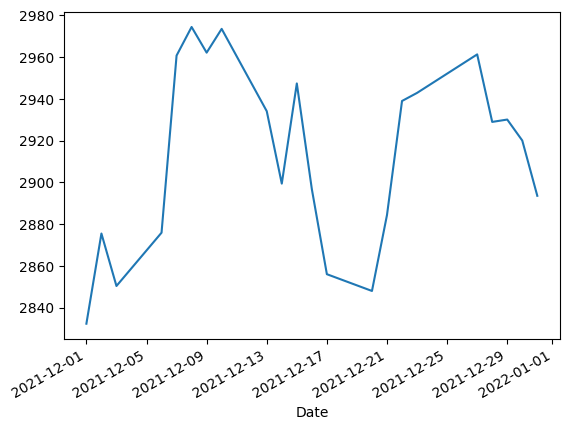

In [78]:
#month
google.loc['2021-12']['Close'].plot()

In [85]:
# frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [84]:
# asfreq
#hour
google.asfreq('6H',method='bfill')

#year -> proti bochorer last date ta dey
google.asfreq('Y')

#month -> proti month r last date
google.asfreq('M')

#day -> everyday
google.asfreq('D')

#business day
google.asfreq('B')

#quarter
google.asfreq('Q')

,Open,High,Low,Close,Adj Close,Volume,month,day
Date,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,Thursday
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,Thursday
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,Friday
...,...,...,...,...,...,...,...,...
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,2068.629883,1459900.0,March,Wednesday
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,Wednesday
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,Thursday


<Axes: xlabel='month'>

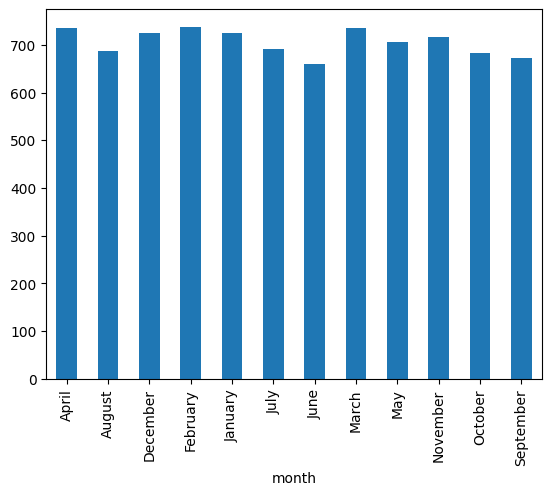

In [86]:
#yearly trend

google.groupby('month')['Close'].mean().plot(kind='bar')

<Axes: xlabel='Date'>

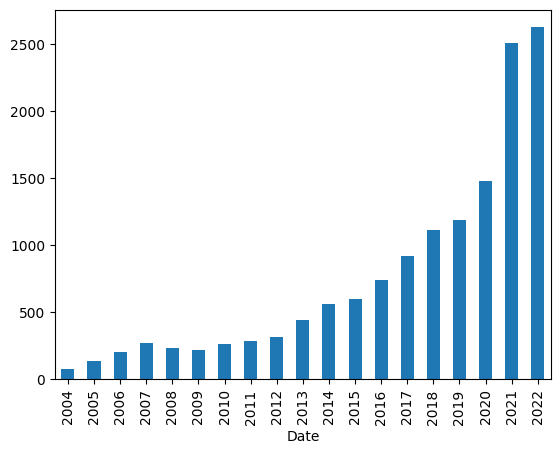

In [87]:
#monthly trend
google.groupby(google.index.year)['Close'].mean().plot(kind='bar')

<Axes: xlabel='quarter'>

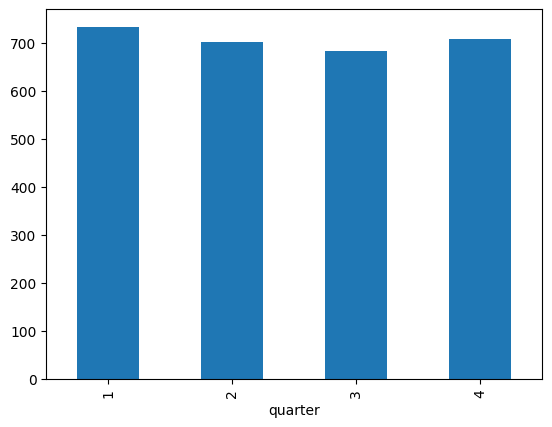

In [90]:
# quaterly trend
google.groupby('quarter')['Close'].mean().plot(kind='bar')

### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<Axes: xlabel='Date'>

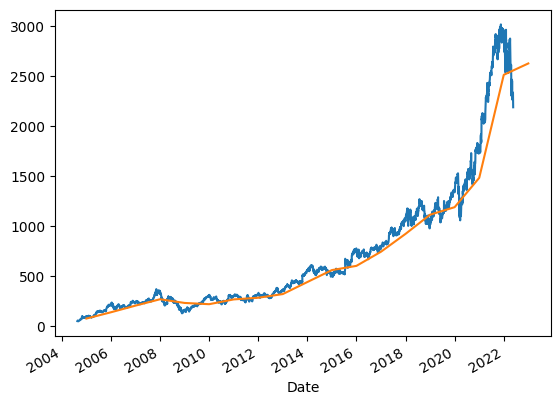

In [98]:
google['Close'].plot()

google['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

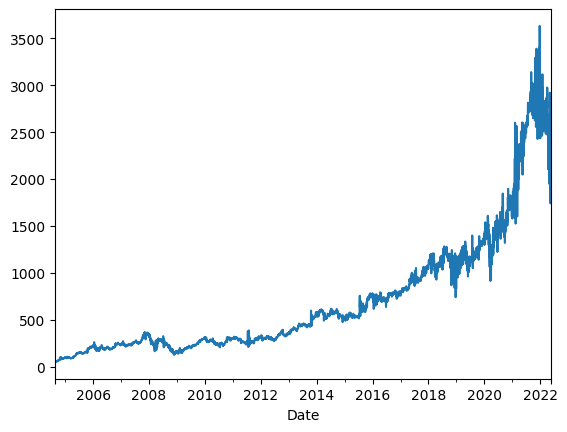

In [99]:
#Upsampling
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

<Axes: title={'center': 'ewm'}, xlabel='Date'>

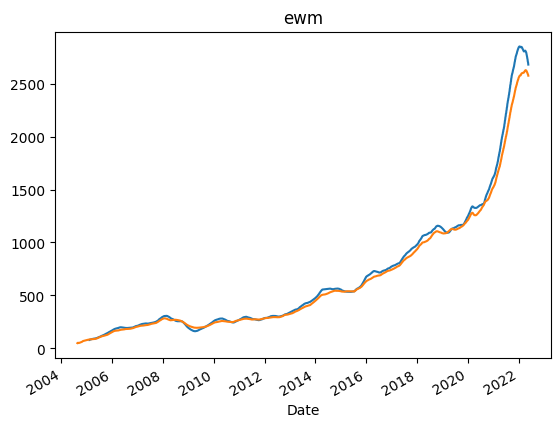

In [103]:
# Rolling window

google['Close'].rolling(120).mean().plot(title='rolling')

#exponential
google['Close'].ewm(120).mean().plot(title='ewm')


### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [104]:
# shift
google['Close']

,Close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086
...,...
2022-05-16,2295.850098
2022-05-17,2334.030029
2022-05-18,2248.020020


In [106]:
google['Close'].shift(1)

,Close
Date,
2004-08-19,NaN
2004-08-20,49.982655
2004-08-23,53.952770
2004-08-24,54.495735
2004-08-25,52.239197
...,...
2022-05-16,2330.310059
2022-05-17,2295.850098
2022-05-18,2334.030029


In [105]:
google['Close'].shift(-1)

,Close
Date,
2004-08-19,53.952770
2004-08-20,54.495735
2004-08-23,52.239197
2004-08-24,52.802086
2004-08-25,53.753517
...,...
2022-05-16,2334.030029
2022-05-17,2248.020020
2022-05-18,2214.909912


In [107]:
# shift example
df = pd.read_csv('/content/login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [108]:
user_df = df[df['user_id'] == 458]
user_df.head()

,user_id,login_time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


In [109]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     208 non-null    int64         
 1   login_time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.0 KB


<ipython-input-109-fd41e73e6ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [110]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

<ipython-input-110-091b95be4a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('0 days 17:29:22.053140096')